In [1]:
from d100.voronoi import voronoi, draw, utils
import numpy as np
import matplotlib.pyplot as pl


towers = utils.random_points(50)
# regular voronoi
vor = voronoi.voronoi(towers)

# bounded voronoi
bounding_box = np.array([0., 1., 0., 1.])  # [x_min, x_max, y_min, y_max]

vor = voronoi.voronoi_bounded(towers, bounding_box)

# vor.regions
# vor.max_bound
# vor.ndim
# vor.ridge_dict
# vor.ridge_points
# vor.ridge_vertices
# vor.npoints
# vor.point_region
# vor.points



In [2]:
# draw.draw_vor(vor, 500, 500, 500)

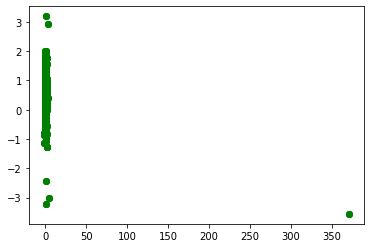

In [3]:
fig = pl.figure()
ax = fig.gca()

# Plot initial points
ax.plot(vor.points[:, 0], vor.points[:, 1], 'b.')

# Plot ridges points
for region in vor.regions:
    vertices = vor.vertices[region, :]
    ax.plot(vertices[:, 0], vertices[:, 1], 'go')

# Plot ridges
# TODO: draw non infinite ridges
# for region in vor.regions:
#     vertices = vor.vertices[region + [region[0]], :]
#     ax.plot(vertices[:, 0], vertices[:, 1], 'k-')

pl.show()


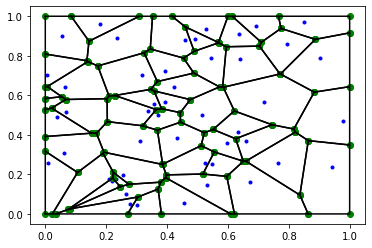

In [4]:
fig = pl.figure()
ax = fig.gca()

# Plot initial points
ax.plot(vor.filtered_points[:, 0], vor.filtered_points[:, 1], 'b.')

# Plot ridges points
for region in vor.filtered_regions:
    vertices = vor.vertices[region, :]
    ax.plot(vertices[:, 0], vertices[:, 1], 'go')

# Plot ridges
for region in vor.filtered_regions:
    vertices = vor.vertices[region + [region[0]], :]
    ax.plot(vertices[:, 0], vertices[:, 1], 'k-')

pl.show()


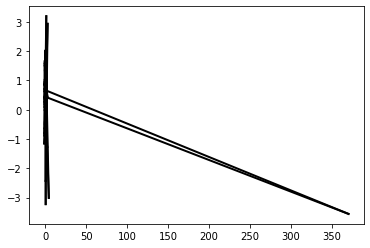

In [5]:
fig = pl.figure()
ax = fig.gca()

# cridge vertives
for vpair in vor.ridge_vertices:
    if vpair[0] >= 0 and vpair[1] >= 0:
        v0 = vor.vertices[vpair[0]]
        v1 = vor.vertices[vpair[1]]
        # Draw a line from v0 to v1.
        pl.plot([v0[0], v1[0]], [v0[1], v1[1]], 'k', linewidth=2)
    

pl.show()

In [6]:
items = enumerate(vor.ridge_dict.items())
_, (points, vpair) = next(items)
_, (points, vpair) = next(items)
_, (points, vpair) = next(items)

print(points, vpair)
print(vor.ridge_points[2])


for vertices in vor.ridge_vertices[2]:
    print(vertices)


(104, 229) [-1, 1]
[104 229]
-1
1


(104, 229) [-1, 1]


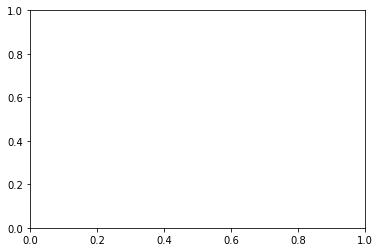

In [7]:

fig = pl.figure()
ax = fig.gca()

items = enumerate(vor.ridge_dict.items())

_, (points, vpair) = next(items)
_, (points, vpair) = next(items)
_, (points, vpair) = next(items)

print(points, vpair)

if vpair[0] >= 0 and vpair[1] >= 0:
    vertices = vor.points[points, :]
    print(vertices[:, 0])
    ax.plot(vertices[:, 0], vertices[:, 1], 'go')
    # ax.plot(vertices, 'go')


    v = vor.vertices[vpair, :]
    # print(v)
    # ax.plot(v, 'k', linewidth=2)
    ax.plot(v[:, 0], v[:, 1], 'k', linewidth=2)
      

pl.show()


## Get all points and ridges that are not infinite from

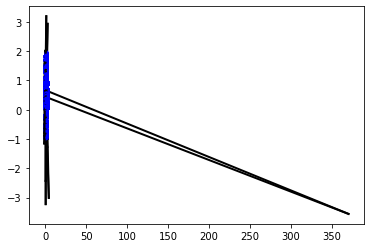

In [8]:
fig = pl.figure()
ax = fig.gca()

for towers, ridge_vertices in vor.ridge_dict.items():
    # only if the ridge is finite (no vertice is -1)
    if ridge_vertices[0] >= 0 and ridge_vertices[1] >= 0:
        v = vor.vertices[ridge_vertices, :]
        # [list of x coords], [ list of y coords]
        ax.plot(v[:, 0], v[:, 1], 'k', linewidth=2)

        vertices = vor.points[towers, :]
        # [list of x coords], [ list of y coords]
        ax.plot(vertices[:, 0], vertices[:, 1], 'b.')
        
pl.show()


## Filter on towers inside playing field

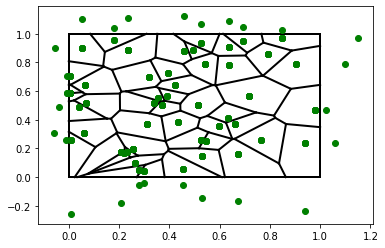

In [9]:
fig = pl.figure()
ax = fig.gca()

for towers, ridge_vertices in vor.ridge_dict.items():
    # only if the ridge is finite (no vertice is -1)
    if ridge_vertices[0] >= 0 and ridge_vertices[1] >= 0:
        if towers[0] < len(vor.filtered_points) or towers[1] < len(vor.filtered_points):
            v = vor.vertices[ridge_vertices, :]
            # [list of x coords], [ list of y coords]
            ax.plot(v[:, 0], v[:, 1], 'k', linewidth=2)

            vertices = vor.points[towers, :]
            # [list of x coords], [ list of y coords]
            ax.plot(vertices[:, 0], vertices[:, 1], 'go')
        
pl.show()

In [10]:
results = {}

for index, point in enumerate(vor.filtered_points):
    region_index = vor.point_region[index]
    region = vor.regions[region_index]
    poly = vor.vertices[region, :]

    # a border is defined by two points and has two vertices as attributes
    borders = {
        points: border_vertices
        for points, border_vertices in vor.ridge_dict.items()
        if index in points and 
            -1 not in border_vertices
    }

    results[index] = dict(
        point=point,
        region_index=region_index,
        poly=poly,
        borders=borders,
    )


In [11]:
import tkinter as tk

root = tk.Tk()
canvas = tk.Canvas(root, width=1000, height=1000, bg='cyan')
canvas.pack()

for index, result in results.items():
    poly = result['poly']
    poly = draw.scale_and_flip(poly, 1000, 1000)
    canvas.create_polygon(
        poly,
        fill='grey', outline='black')


kingdom = 0

result = results[kingdom]
poly = result['poly']
poly = draw.scale_and_flip(poly, 1000, 1000)
canvas.create_polygon(poly, fill=draw.random_color(), outline='black')

for points, vertices in result['borders'].items():
    poly = [vor.vertices[v] for v in vertices]
    poly = draw.scale_and_flip(poly, 1000, 1000)
    canvas.create_line(poly, fill='red',)

    neighbour_point = [point for point in points if point != kingdom][0]
    neighbour_region = vor.point_region[neighbour_point]
    poly = [vor.vertices[v] for v in vor.regions[neighbour_region]]
    poly = draw.scale_and_flip(poly, 1000, 1000)
    canvas.create_polygon(poly, fill='blue', outline='black')

root.mainloop()

(7, 0) [286, 287]
(9, 0) [282, 287]
(44, 0) [281, 282]
(5, 0) [93, 281]
(0, 200) [317, 318]
(0, 42) [286, 317]
(0, 4) [93, 175]
(0, 39) [175, 318]
